In [1]:
import matplotlib.pyplot as plt
import wandb
import torch
import seaborn as sns
sns.set_style('whitegrid')
import pandas as pd
import numpy
from tqdm.auto import tqdm


/home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
names = {
    'SubstructureFingerprintCount': 'SSC',
    'PubchemFingerprinter': 'PubChem',
    'MACCSFingerprinter': 'MACCS',
    'KlekotaRothFingerprintCount': 'KRC',
    'EStateFingerprinter': 'E-state',
    'MolCLR_GIN_mean': 'MolCLR (mean)',
    'MoleBERT_mean': 'MoleBERT (mean)',
    'ChemBERTa_zinc250k_v2_40k_mean': 'ChemBERTa (mean)',
    'AtomPairs2DFingerprintCount': 'AP2DC',
    'KPGT_base': 'KPGT',
    'OptimizedFishToxFingerprinter': 'OFT'
}

order = [
    names['AtomPairs2DFingerprintCount'],
    names['MACCSFingerprinter'],
    names['EStateFingerprinter'],
    names['KlekotaRothFingerprintCount'],
    names['PubchemFingerprinter'],
    names['SubstructureFingerprintCount'],
    # names['OptimizedFishToxFingerprinter'],
    names['ChemBERTa_zinc250k_v2_40k_mean'],
    names['MolCLR_GIN_mean'],
    names['MoleBERT_mean'],
    names['KPGT_base'],
]

ml_repr = [
    names['ChemBERTa_zinc250k_v2_40k_mean'],
    names['MolCLR_GIN_mean'],
    names['MoleBERT_mean'],
    names['KPGT_base'],
]



In [4]:
import encoder as encoder_module

run_info = []
raw_results = []
api = wandb.Api()
# FishTox Only
# runs = [run for run in api.sweep('mfederici/infomol/vndc3ra0').runs]
# Everything else
runs = [run for run in api.sweep('mfederici/infomol/e9rm3mxd').runs]

for run in tqdm(runs):
    if run.state != 'finished':
        print(run.id, run.state)
    else:
        encoder_params = run.config['data']['encoder']
        encoder_class = encoder_params['_target_']
        del encoder_params['_target_']
        encoder_class = getattr(encoder_module, encoder_class.replace('encoder.',''))
        name = encoder_class.get_name(**encoder_params) 
        
        n_dim = encoder_class.get_n_dim(**encoder_params)
        seed = run.config['method']['seed']
        dataset = run.config['data']['dataset']
        if 'name' in dataset:
            dataset = dataset['name']
        elif 'AQSOLSmiles' in dataset['_target_']:
            dataset = 'aqsol'
        elif 'FishTox' in dataset['_target_']:
            dataset = 'fishtox'
        else:
            print(dataset)
            raise NotImplementedError()
        r_idx = run.id
        run_info.append({
            'encoder': name,
            'dataset': dataset,
            'r_idx': r_idx,
            'n_dim': n_dim,
            'seed': seed,
        })
        run_results = run.history()
        run_results['r_idx'] = run.id
        raw_results.append(run_results)
        
        
run_info = pd.DataFrame(run_info)
raw_results = pd.concat(raw_results)

  0%|          | 0/372 [00:00<?, ?it/s]

tl4uy0lg failed
encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


  1%|          | 2/372 [00:00<01:05,  5.64it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


  1%|          | 3/372 [00:00<01:43,  3.56it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


  1%|          | 4/372 [00:01<01:58,  3.10it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


  1%|▏         | 5/372 [00:01<02:18,  2.65it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


  2%|▏         | 6/372 [00:02<02:47,  2.19it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


  2%|▏         | 7/372 [00:02<02:44,  2.21it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


  2%|▏         | 8/372 [00:03<02:38,  2.29it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


  2%|▏         | 9/372 [00:03<02:47,  2.17it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


  3%|▎         | 10/372 [00:04<02:54,  2.08it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


  3%|▎         | 11/372 [00:04<02:36,  2.31it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


  3%|▎         | 12/372 [00:04<02:39,  2.26it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


  3%|▎         | 13/372 [00:05<02:40,  2.24it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


  4%|▍         | 14/372 [00:05<02:44,  2.17it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


  4%|▍         | 15/372 [00:06<02:45,  2.15it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


  4%|▍         | 16/372 [00:06<02:42,  2.19it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


  5%|▍         | 17/372 [00:07<02:42,  2.19it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


  5%|▍         | 18/372 [00:07<02:32,  2.33it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


  5%|▌         | 19/372 [00:08<02:37,  2.24it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


  5%|▌         | 20/372 [00:08<02:40,  2.19it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


  6%|▌         | 21/372 [00:09<02:39,  2.20it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


  6%|▌         | 22/372 [00:09<02:31,  2.31it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


  6%|▌         | 23/372 [00:09<02:32,  2.28it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


  6%|▋         | 24/372 [00:10<02:27,  2.35it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


  7%|▋         | 25/372 [00:10<02:31,  2.28it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


  7%|▋         | 26/372 [00:11<02:36,  2.21it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


  7%|▋         | 27/372 [00:11<02:40,  2.16it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


  8%|▊         | 28/372 [00:12<02:37,  2.18it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


  8%|▊         | 29/372 [00:12<02:28,  2.32it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


  8%|▊         | 30/372 [00:13<02:36,  2.18it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


  8%|▊         | 31/372 [00:13<02:28,  2.29it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


  9%|▊         | 32/372 [00:13<02:34,  2.20it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


  9%|▉         | 33/372 [00:14<02:30,  2.25it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


  9%|▉         | 34/372 [00:14<02:33,  2.20it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


  9%|▉         | 35/372 [00:15<02:30,  2.25it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 10%|▉         | 36/372 [00:15<02:26,  2.30it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 10%|▉         | 37/372 [00:16<02:33,  2.18it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 10%|█         | 38/372 [00:16<02:31,  2.20it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 10%|█         | 39/372 [00:17<02:24,  2.30it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 11%|█         | 40/372 [00:17<02:21,  2.35it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 11%|█         | 41/372 [00:17<02:22,  2.32it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 11%|█▏        | 42/372 [00:18<02:26,  2.25it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 12%|█▏        | 43/372 [00:18<02:21,  2.33it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 12%|█▏        | 44/372 [00:19<02:17,  2.38it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 12%|█▏        | 45/372 [00:19<02:24,  2.26it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 12%|█▏        | 46/372 [00:20<02:25,  2.25it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 13%|█▎        | 47/372 [00:20<02:15,  2.40it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 13%|█▎        | 48/372 [00:20<02:22,  2.28it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 13%|█▎        | 49/372 [00:21<02:24,  2.23it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 13%|█▎        | 50/372 [00:21<02:20,  2.30it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 14%|█▎        | 51/372 [00:22<02:20,  2.28it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 14%|█▍        | 52/372 [00:22<02:33,  2.09it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 14%|█▍        | 53/372 [00:23<02:25,  2.19it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 15%|█▍        | 54/372 [00:23<02:43,  1.95it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 15%|█▍        | 55/372 [00:24<02:37,  2.02it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 15%|█▌        | 56/372 [00:24<02:33,  2.06it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 15%|█▌        | 57/372 [00:25<02:30,  2.10it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 16%|█▌        | 58/372 [00:25<02:25,  2.15it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 16%|█▌        | 59/372 [00:26<02:19,  2.24it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 16%|█▌        | 60/372 [00:26<02:15,  2.30it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 16%|█▋        | 61/372 [00:27<02:24,  2.15it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 17%|█▋        | 62/372 [00:27<02:21,  2.19it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 17%|█▋        | 63/372 [00:27<02:11,  2.35it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 17%|█▋        | 64/372 [00:28<02:14,  2.30it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 17%|█▋        | 65/372 [00:28<02:19,  2.20it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 18%|█▊        | 66/372 [00:29<02:11,  2.33it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 18%|█▊        | 67/372 [00:29<02:18,  2.20it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 18%|█▊        | 68/372 [00:30<02:17,  2.22it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 19%|█▊        | 69/372 [00:30<02:27,  2.06it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 19%|█▉        | 70/372 [00:31<02:19,  2.17it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 19%|█▉        | 71/372 [00:31<02:12,  2.27it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 19%|█▉        | 72/372 [00:31<02:16,  2.20it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 20%|█▉        | 73/372 [00:32<02:25,  2.05it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 20%|█▉        | 74/372 [00:32<02:18,  2.14it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 20%|██        | 75/372 [00:33<02:14,  2.20it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 20%|██        | 76/372 [00:33<02:17,  2.15it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 21%|██        | 77/372 [00:34<02:12,  2.22it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 21%|██        | 78/372 [00:34<02:07,  2.30it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 21%|██        | 79/372 [00:35<02:06,  2.32it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 22%|██▏       | 80/372 [00:35<02:02,  2.39it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 22%|██▏       | 81/372 [00:35<02:07,  2.27it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 22%|██▏       | 82/372 [00:36<02:06,  2.29it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 22%|██▏       | 83/372 [00:36<02:05,  2.31it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 23%|██▎       | 84/372 [00:37<02:04,  2.31it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 23%|██▎       | 85/372 [00:37<01:59,  2.41it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 23%|██▎       | 86/372 [00:38<02:04,  2.30it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 23%|██▎       | 87/372 [00:38<02:06,  2.26it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 24%|██▎       | 88/372 [00:38<02:00,  2.36it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 24%|██▍       | 89/372 [00:39<01:59,  2.36it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 24%|██▍       | 90/372 [00:39<01:57,  2.40it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 24%|██▍       | 91/372 [00:40<01:57,  2.39it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 25%|██▍       | 92/372 [00:40<01:58,  2.37it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 25%|██▌       | 93/372 [00:40<01:54,  2.44it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 25%|██▌       | 94/372 [00:41<01:58,  2.35it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 26%|██▌       | 95/372 [00:41<01:56,  2.38it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 26%|██▌       | 96/372 [00:42<02:04,  2.22it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 26%|██▌       | 97/372 [00:42<02:00,  2.28it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 26%|██▋       | 98/372 [00:43<02:01,  2.25it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 27%|██▋       | 99/372 [00:43<01:59,  2.29it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 27%|██▋       | 100/372 [00:44<01:54,  2.38it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 27%|██▋       | 101/372 [00:44<01:51,  2.42it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 27%|██▋       | 102/372 [00:44<01:57,  2.30it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 28%|██▊       | 103/372 [00:45<02:00,  2.23it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 28%|██▊       | 104/372 [00:45<01:57,  2.28it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 28%|██▊       | 105/372 [00:46<01:53,  2.36it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 28%|██▊       | 106/372 [00:46<01:58,  2.25it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 29%|██▉       | 107/372 [00:47<02:04,  2.12it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 29%|██▉       | 108/372 [00:47<01:58,  2.23it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 29%|██▉       | 109/372 [00:48<01:52,  2.34it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 30%|██▉       | 110/372 [00:48<02:01,  2.15it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 30%|██▉       | 111/372 [00:48<01:55,  2.27it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 30%|███       | 112/372 [00:49<01:52,  2.31it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 30%|███       | 113/372 [00:49<01:54,  2.26it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 31%|███       | 114/372 [00:50<01:49,  2.36it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 31%|███       | 115/372 [00:50<01:42,  2.51it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 31%|███       | 116/372 [00:50<01:39,  2.57it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 31%|███▏      | 117/372 [00:51<01:44,  2.44it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 32%|███▏      | 118/372 [00:51<01:49,  2.32it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 32%|███▏      | 119/372 [00:52<01:49,  2.32it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 32%|███▏      | 120/372 [00:52<01:47,  2.34it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 33%|███▎      | 121/372 [00:53<01:47,  2.33it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 33%|███▎      | 122/372 [00:53<01:55,  2.17it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 33%|███▎      | 123/372 [00:54<02:00,  2.06it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 33%|███▎      | 124/372 [00:54<01:57,  2.11it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 34%|███▎      | 125/372 [00:55<01:52,  2.19it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 34%|███▍      | 126/372 [00:55<01:43,  2.38it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 34%|███▍      | 127/372 [00:55<01:44,  2.36it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 34%|███▍      | 128/372 [00:56<01:38,  2.49it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 35%|███▍      | 129/372 [00:56<01:40,  2.42it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 35%|███▍      | 130/372 [00:57<01:37,  2.49it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 35%|███▌      | 131/372 [00:57<01:42,  2.35it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 35%|███▌      | 132/372 [00:57<01:43,  2.33it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 36%|███▌      | 133/372 [00:58<01:37,  2.46it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 36%|███▌      | 134/372 [00:58<01:41,  2.35it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 36%|███▋      | 135/372 [00:59<01:41,  2.32it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 37%|███▋      | 136/372 [00:59<01:42,  2.31it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 37%|███▋      | 137/372 [01:00<01:37,  2.40it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 37%|███▋      | 138/372 [01:00<01:38,  2.36it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 37%|███▋      | 139/372 [01:00<01:36,  2.42it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 38%|███▊      | 140/372 [01:01<01:38,  2.36it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 38%|███▊      | 141/372 [01:01<01:37,  2.38it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 38%|███▊      | 142/372 [01:02<01:39,  2.32it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 38%|███▊      | 143/372 [01:02<01:40,  2.28it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 39%|███▊      | 144/372 [01:03<01:44,  2.18it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 39%|███▉      | 145/372 [01:03<01:42,  2.21it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 39%|███▉      | 146/372 [01:04<01:41,  2.22it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 40%|███▉      | 147/372 [01:04<01:39,  2.26it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 40%|███▉      | 148/372 [01:04<01:38,  2.27it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 40%|████      | 149/372 [01:05<01:34,  2.36it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 40%|████      | 150/372 [01:05<01:36,  2.29it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 41%|████      | 151/372 [01:06<01:35,  2.31it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 41%|████      | 152/372 [01:06<01:34,  2.33it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 41%|████      | 153/372 [01:06<01:31,  2.38it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 41%|████▏     | 154/372 [01:07<01:40,  2.18it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 42%|████▏     | 155/372 [01:07<01:34,  2.30it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 42%|████▏     | 156/372 [01:08<01:33,  2.32it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 42%|████▏     | 157/372 [01:08<01:32,  2.31it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 42%|████▏     | 158/372 [01:09<01:33,  2.28it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 43%|████▎     | 159/372 [01:09<01:30,  2.35it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 43%|████▎     | 160/372 [01:10<01:29,  2.36it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 43%|████▎     | 161/372 [01:10<01:29,  2.35it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 44%|████▎     | 162/372 [01:10<01:23,  2.51it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 44%|████▍     | 163/372 [01:11<01:21,  2.56it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 44%|████▍     | 164/372 [01:11<01:19,  2.62it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 44%|████▍     | 165/372 [01:12<01:26,  2.39it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 45%|████▍     | 166/372 [01:12<01:26,  2.38it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 45%|████▍     | 167/372 [01:12<01:25,  2.39it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 45%|████▌     | 168/372 [01:13<01:29,  2.29it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 45%|████▌     | 169/372 [01:13<01:27,  2.31it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 46%|████▌     | 170/372 [01:14<01:26,  2.33it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 46%|████▌     | 171/372 [01:14<01:27,  2.30it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 46%|████▌     | 172/372 [01:15<01:25,  2.35it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 47%|████▋     | 173/372 [01:15<01:25,  2.34it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 47%|████▋     | 174/372 [01:15<01:26,  2.30it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 47%|████▋     | 175/372 [01:16<01:28,  2.23it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 47%|████▋     | 176/372 [01:16<01:25,  2.29it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 48%|████▊     | 177/372 [01:17<01:24,  2.31it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 48%|████▊     | 178/372 [01:17<01:22,  2.34it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 48%|████▊     | 179/372 [01:18<01:20,  2.39it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 48%|████▊     | 180/372 [01:18<01:22,  2.31it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 49%|████▊     | 181/372 [01:19<01:26,  2.20it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 49%|████▉     | 182/372 [01:19<01:28,  2.14it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 49%|████▉     | 183/372 [01:19<01:26,  2.19it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 49%|████▉     | 184/372 [01:20<01:45,  1.78it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 50%|████▉     | 185/372 [01:21<01:43,  1.80it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 50%|█████     | 186/372 [01:21<01:35,  1.95it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 50%|█████     | 187/372 [01:22<01:34,  1.96it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 51%|█████     | 188/372 [01:22<01:34,  1.96it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 51%|█████     | 189/372 [01:23<01:26,  2.12it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 51%|█████     | 190/372 [01:23<01:22,  2.20it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 51%|█████▏    | 191/372 [01:23<01:21,  2.23it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 52%|█████▏    | 192/372 [01:24<01:17,  2.31it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 52%|█████▏    | 193/372 [01:24<01:18,  2.27it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 52%|█████▏    | 194/372 [01:25<01:16,  2.31it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 52%|█████▏    | 195/372 [01:25<01:20,  2.20it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 53%|█████▎    | 196/372 [01:26<01:17,  2.27it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 53%|█████▎    | 197/372 [01:26<01:18,  2.23it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 53%|█████▎    | 198/372 [01:26<01:14,  2.34it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 53%|█████▎    | 199/372 [01:27<01:14,  2.34it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 54%|█████▍    | 200/372 [01:27<01:18,  2.20it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 54%|█████▍    | 201/372 [01:28<01:18,  2.17it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 54%|█████▍    | 202/372 [01:28<01:16,  2.22it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 55%|█████▍    | 203/372 [01:29<01:13,  2.28it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 55%|█████▍    | 204/372 [01:29<01:13,  2.28it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 55%|█████▌    | 205/372 [01:30<01:09,  2.40it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 55%|█████▌    | 206/372 [01:30<01:10,  2.35it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 56%|█████▌    | 207/372 [01:30<01:09,  2.39it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 56%|█████▌    | 208/372 [01:31<01:09,  2.35it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 56%|█████▌    | 209/372 [01:31<01:08,  2.38it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 56%|█████▋    | 210/372 [01:32<01:11,  2.25it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 57%|█████▋    | 211/372 [01:32<01:13,  2.20it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 57%|█████▋    | 212/372 [01:33<01:12,  2.21it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 57%|█████▋    | 213/372 [01:33<01:08,  2.31it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 58%|█████▊    | 214/372 [01:33<01:07,  2.32it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 58%|█████▊    | 215/372 [01:34<01:03,  2.48it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 58%|█████▊    | 216/372 [01:34<01:02,  2.50it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 58%|█████▊    | 217/372 [01:35<01:06,  2.33it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 59%|█████▊    | 218/372 [01:35<01:03,  2.43it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 59%|█████▉    | 219/372 [01:36<01:09,  2.19it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 59%|█████▉    | 220/372 [01:36<01:05,  2.33it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 59%|█████▉    | 221/372 [01:36<01:05,  2.32it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 60%|█████▉    | 222/372 [01:37<01:02,  2.40it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 60%|█████▉    | 223/372 [01:37<01:02,  2.37it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 60%|██████    | 224/372 [01:38<00:59,  2.47it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 60%|██████    | 225/372 [01:38<01:01,  2.40it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 61%|██████    | 226/372 [01:38<01:01,  2.38it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 61%|██████    | 227/372 [01:39<01:02,  2.31it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 61%|██████▏   | 228/372 [01:39<01:02,  2.31it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 62%|██████▏   | 229/372 [01:40<01:00,  2.37it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 62%|██████▏   | 230/372 [01:40<01:00,  2.34it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 62%|██████▏   | 231/372 [01:41<00:58,  2.39it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 62%|██████▏   | 232/372 [01:41<01:00,  2.33it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 63%|██████▎   | 233/372 [01:42<01:02,  2.23it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 63%|██████▎   | 234/372 [01:42<01:02,  2.21it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 63%|██████▎   | 235/372 [01:43<01:03,  2.15it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 63%|██████▎   | 236/372 [01:43<01:00,  2.26it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 64%|██████▎   | 237/372 [01:43<00:56,  2.40it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 64%|██████▍   | 238/372 [01:44<00:58,  2.28it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 64%|██████▍   | 239/372 [01:44<01:02,  2.12it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 65%|██████▍   | 240/372 [01:45<00:59,  2.23it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 65%|██████▍   | 241/372 [01:45<00:57,  2.27it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 65%|██████▌   | 242/372 [01:46<00:57,  2.25it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 65%|██████▌   | 243/372 [01:46<00:53,  2.41it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 66%|██████▌   | 244/372 [01:46<00:53,  2.39it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 66%|██████▌   | 245/372 [01:47<00:51,  2.46it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 66%|██████▌   | 246/372 [01:47<00:49,  2.52it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 66%|██████▋   | 247/372 [01:48<00:49,  2.53it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 67%|██████▋   | 248/372 [01:48<00:50,  2.45it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 67%|██████▋   | 249/372 [01:48<00:50,  2.43it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 67%|██████▋   | 250/372 [01:49<00:50,  2.41it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 67%|██████▋   | 251/372 [01:49<00:51,  2.33it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 68%|██████▊   | 252/372 [01:50<00:48,  2.48it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 68%|██████▊   | 253/372 [01:50<00:50,  2.34it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 68%|██████▊   | 254/372 [01:50<00:49,  2.36it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 69%|██████▊   | 255/372 [01:51<00:51,  2.29it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 69%|██████▉   | 256/372 [01:51<00:49,  2.37it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 69%|██████▉   | 257/372 [01:52<00:49,  2.33it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 69%|██████▉   | 258/372 [01:52<00:46,  2.45it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 70%|██████▉   | 259/372 [01:53<00:48,  2.34it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 70%|██████▉   | 260/372 [01:53<00:46,  2.40it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 70%|███████   | 261/372 [01:53<00:45,  2.41it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 70%|███████   | 262/372 [01:54<00:46,  2.36it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 71%|███████   | 263/372 [01:54<00:47,  2.32it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 71%|███████   | 264/372 [01:55<00:45,  2.39it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 71%|███████   | 265/372 [01:55<00:44,  2.43it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 72%|███████▏  | 266/372 [01:56<00:47,  2.23it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 72%|███████▏  | 267/372 [01:56<00:52,  2.00it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 72%|███████▏  | 268/372 [01:57<00:56,  1.83it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 72%|███████▏  | 269/372 [01:57<00:53,  1.91it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 73%|███████▎  | 270/372 [01:58<00:52,  1.96it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 73%|███████▎  | 271/372 [01:58<00:47,  2.11it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 73%|███████▎  | 272/372 [01:59<00:50,  1.97it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 73%|███████▎  | 273/372 [01:59<00:49,  2.00it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 74%|███████▎  | 274/372 [02:00<00:45,  2.16it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 74%|███████▍  | 275/372 [02:00<00:45,  2.15it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 74%|███████▍  | 276/372 [02:01<00:46,  2.07it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 74%|███████▍  | 277/372 [02:01<00:45,  2.10it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 75%|███████▍  | 278/372 [02:02<00:44,  2.10it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 75%|███████▌  | 279/372 [02:02<00:42,  2.20it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 75%|███████▌  | 280/372 [02:02<00:40,  2.26it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 76%|███████▌  | 281/372 [02:03<00:38,  2.38it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 76%|███████▌  | 282/372 [02:03<00:36,  2.47it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 76%|███████▌  | 283/372 [02:04<00:35,  2.48it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 76%|███████▋  | 284/372 [02:04<00:39,  2.24it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 77%|███████▋  | 285/372 [02:05<00:37,  2.29it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 77%|███████▋  | 286/372 [02:05<00:35,  2.41it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 77%|███████▋  | 287/372 [02:05<00:34,  2.46it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 77%|███████▋  | 288/372 [02:10<02:29,  1.78s/it]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 78%|███████▊  | 289/372 [02:11<02:01,  1.46s/it]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 78%|███████▊  | 290/372 [02:11<01:33,  1.14s/it]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 78%|███████▊  | 291/372 [02:12<01:13,  1.10it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 78%|███████▊  | 292/372 [02:12<01:01,  1.30it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 79%|███████▉  | 293/372 [02:13<00:53,  1.48it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 79%|███████▉  | 294/372 [02:13<00:51,  1.53it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 79%|███████▉  | 295/372 [02:14<00:43,  1.76it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 80%|███████▉  | 296/372 [02:14<00:41,  1.85it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 80%|███████▉  | 297/372 [02:15<00:37,  2.00it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 80%|████████  | 298/372 [02:15<00:34,  2.12it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 80%|████████  | 299/372 [02:15<00:34,  2.13it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 81%|████████  | 300/372 [02:16<00:33,  2.13it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 81%|████████  | 301/372 [02:16<00:32,  2.16it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 81%|████████  | 302/372 [02:17<00:32,  2.13it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 81%|████████▏ | 303/372 [02:17<00:31,  2.19it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 82%|████████▏ | 304/372 [02:18<00:32,  2.06it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 82%|████████▏ | 305/372 [02:18<00:30,  2.19it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 82%|████████▏ | 306/372 [02:19<00:28,  2.29it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 83%|████████▎ | 307/372 [02:19<00:28,  2.31it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 83%|████████▎ | 308/372 [02:19<00:28,  2.28it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 83%|████████▎ | 309/372 [02:20<00:28,  2.21it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 83%|████████▎ | 310/372 [02:20<00:27,  2.26it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 84%|████████▎ | 311/372 [02:21<00:26,  2.31it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 84%|████████▍ | 312/372 [02:21<00:24,  2.42it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 84%|████████▍ | 313/372 [02:22<00:25,  2.30it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 84%|████████▍ | 314/372 [02:22<00:25,  2.28it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 85%|████████▍ | 315/372 [02:23<00:26,  2.14it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 85%|████████▍ | 316/372 [02:23<00:26,  2.11it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 85%|████████▌ | 317/372 [02:24<00:26,  2.05it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 85%|████████▌ | 318/372 [02:24<00:26,  2.01it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 86%|████████▌ | 319/372 [02:24<00:24,  2.16it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 86%|████████▌ | 320/372 [02:25<00:24,  2.13it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 86%|████████▋ | 321/372 [02:25<00:23,  2.18it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 87%|████████▋ | 322/372 [02:26<00:22,  2.25it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 87%|████████▋ | 323/372 [02:26<00:21,  2.28it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 87%|████████▋ | 324/372 [02:27<00:21,  2.26it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 87%|████████▋ | 325/372 [02:27<00:20,  2.25it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 88%|████████▊ | 326/372 [02:28<00:20,  2.25it/s]

encoder.SubstructureFingerprintCount {'_target_': 'encoder.SubstructureFingerprintCount'}


 88%|████████▊ | 327/372 [02:29<00:32,  1.38it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 88%|████████▊ | 328/372 [02:29<00:29,  1.50it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 88%|████████▊ | 329/372 [02:30<00:25,  1.69it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 89%|████████▊ | 330/372 [02:30<00:23,  1.77it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 89%|████████▉ | 331/372 [02:31<00:20,  2.00it/s]

encoder.PubchemFingerprinter {'_target_': 'encoder.PubchemFingerprinter'}


 89%|████████▉ | 332/372 [02:31<00:19,  2.04it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 90%|████████▉ | 333/372 [02:32<00:18,  2.12it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 90%|████████▉ | 334/372 [02:32<00:17,  2.20it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 90%|█████████ | 335/372 [02:32<00:16,  2.28it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 90%|█████████ | 336/372 [02:33<00:16,  2.20it/s]

encoder.MACCSFingerprinter {'_target_': 'encoder.MACCSFingerprinter'}


 91%|█████████ | 337/372 [02:33<00:14,  2.39it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 91%|█████████ | 338/372 [02:34<00:14,  2.35it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 91%|█████████ | 339/372 [02:34<00:14,  2.35it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 91%|█████████▏| 340/372 [02:35<00:14,  2.25it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 92%|█████████▏| 341/372 [02:35<00:13,  2.25it/s]

encoder.KlekotaRothFingerprintCount {'_target_': 'encoder.KlekotaRothFingerprintCount'}


 92%|█████████▏| 342/372 [02:40<00:52,  1.75s/it]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 92%|█████████▏| 343/372 [02:41<00:42,  1.48s/it]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 92%|█████████▏| 344/372 [02:41<00:32,  1.16s/it]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 93%|█████████▎| 345/372 [02:42<00:25,  1.06it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 93%|█████████▎| 346/372 [02:42<00:21,  1.21it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 93%|█████████▎| 347/372 [02:43<00:19,  1.27it/s]

encoder.EStateFingerprinter {'_target_': 'encoder.EStateFingerprinter'}


 94%|█████████▎| 348/372 [02:43<00:16,  1.42it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 94%|█████████▍| 349/372 [02:44<00:15,  1.51it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 94%|█████████▍| 350/372 [02:44<00:13,  1.67it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 94%|█████████▍| 351/372 [02:45<00:11,  1.85it/s]

encoder.KPGTEncoder {'_target_': 'encoder.KPGTEncoder'}


 95%|█████████▍| 352/372 [02:45<00:10,  1.92it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 95%|█████████▍| 353/372 [02:46<00:09,  1.96it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 95%|█████████▌| 354/372 [02:46<00:09,  1.96it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 95%|█████████▌| 355/372 [02:47<00:08,  2.05it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 96%|█████████▌| 356/372 [02:47<00:07,  2.08it/s]

encoder.MolCLREncoder {'pool': 'mean', '_target_': 'encoder.MolCLREncoder', 'architecture': 'GIN'}


 96%|█████████▌| 357/372 [02:48<00:07,  2.13it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 96%|█████████▌| 358/372 [02:48<00:06,  2.18it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 97%|█████████▋| 359/372 [02:48<00:05,  2.20it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 97%|█████████▋| 360/372 [02:49<00:05,  2.31it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 97%|█████████▋| 361/372 [02:49<00:04,  2.37it/s]

encoder.MoleBERTEncoder {'pool': 'mean', '_target_': 'encoder.MoleBERTEncoder'}


 97%|█████████▋| 362/372 [02:50<00:04,  2.32it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 98%|█████████▊| 363/372 [02:50<00:03,  2.33it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 98%|█████████▊| 364/372 [02:50<00:03,  2.49it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 98%|█████████▊| 365/372 [02:51<00:03,  2.27it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 98%|█████████▊| 366/372 [02:51<00:02,  2.20it/s]

encoder.ChemBERTaEncoder {'pool': 'mean', '_target_': 'encoder.ChemBERTaEncoder', 'pretrained_model_name_or_path': 'seyonec/ChemBERTa_zinc250k_v2_40k'}


 99%|█████████▊| 367/372 [02:52<00:02,  2.15it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 99%|█████████▉| 368/372 [02:52<00:01,  2.26it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 99%|█████████▉| 369/372 [02:53<00:01,  2.24it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


 99%|█████████▉| 370/372 [02:53<00:00,  2.09it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


100%|█████████▉| 371/372 [02:54<00:00,  2.03it/s]

encoder.AtomPairs2DFingerprintCount {'_target_': 'encoder.AtomPairs2DFingerprintCount'}


100%|██████████| 372/372 [02:54<00:00,  2.13it/s]


In [24]:
results = raw_results.melt(id_vars=['r_idx','_runtime', 'iteration', '_timestamp', '_step', 'epoch'], var_name='split', value_name="mutual_information")
# Clean up the 'split' column to only contain "train", "valid", or "test"
results["split"] = results["split"].str.replace('/.*', '', regex=True)


In [25]:
print(len(results))
failed = results[results['mutual_information'] == 'NaN']
failed_runs = failed['r_idx'].unique()
results = results[results['mutual_information'] != 'NaN']
print(len(results))
results['mutual_information'] = pd.to_numeric(results['mutual_information'])
agg_results = results[
    ['r_idx', 'mutual_information', 'split']
].groupby(['r_idx', 'split']).mean().reset_index()

14760
11868


In [26]:
failed

,r_idx,_runtime,iteration,_timestamp,_step,epoch,split,mutual_information
190,oa87lly8,12.768620,450,1.710241e+09,450,450,valid,NaN
191,oa87lly8,18.546346,900,1.710241e+09,900,900,valid,NaN
192,oa87lly8,24.402303,1350,1.710241e+09,1350,1350,valid,NaN
193,oa87lly8,30.705723,1800,1.710241e+09,1800,1800,valid,NaN
194,oa87lly8,37.148028,2250,1.710241e+09,2250,2250,valid,NaN
...,...,...,...,...,...,...,...,...
14204,vdemua8y,182.196903,12500,1.710168e+09,12500,12500,test,NaN
14205,vdemua8y,216.807146,15000,1.710168e+09,15000,15000,test,NaN
14206,vdemua8y,251.418304,17500,1.710168e+09,17500,17500,test,NaN
14208,vdemua8y,355.978932,25625,1.710168e+09,25625,25625,test,NaN


In [27]:
for r_idx in failed_runs:
    print(run_info[run_info['r_idx']==r_idx].values)

[['encoder.SubstructureFingerprintCount' 'SIDER' 'oa87lly8' 10 2]]
[['encoder.SubstructureFingerprintCount' 'SIDER' '5ob4mu7x' 10 32]]
[['encoder.SubstructureFingerprintCount' 'SIDER' 'id1skhk8' 10 404]]
[['encoder.SubstructureFingerprintCount' 'SIDER' '78rid30x' 10 7]]
[['encoder.SubstructureFingerprintCount' 'SIDER' 'ns070t4b' 10 42]]
[['encoder.PubchemFingerprinter' 'SIDER' '55u56soy' 10 2]]
[['encoder.PubchemFingerprinter' 'SIDER' 'gddvf38q' 10 32]]
[['encoder.PubchemFingerprinter' 'SIDER' 'cfnkhiwa' 10 404]]
[['encoder.PubchemFingerprinter' 'SIDER' '2yjr32h2' 10 7]]
[['encoder.PubchemFingerprinter' 'SIDER' 'c6f1nedv' 10 42]]
[['encoder.MACCSFingerprinter' 'SIDER' 'qqetzq0j' 10 2]]
[['encoder.MACCSFingerprinter' 'SIDER' '01n2js4u' 10 32]]
[['encoder.MACCSFingerprinter' 'SIDER' 'ts8u4te4' 10 404]]
[['encoder.MACCSFingerprinter' 'SIDER' 'aff07j2n' 10 7]]
[['encoder.MACCSFingerprinter' 'SIDER' 'o0o0iwka' 10 42]]
[['encoder.KlekotaRothFingerprintCount' 'SIDER' 'l0cfvpxx' 10 2]]
[['enco

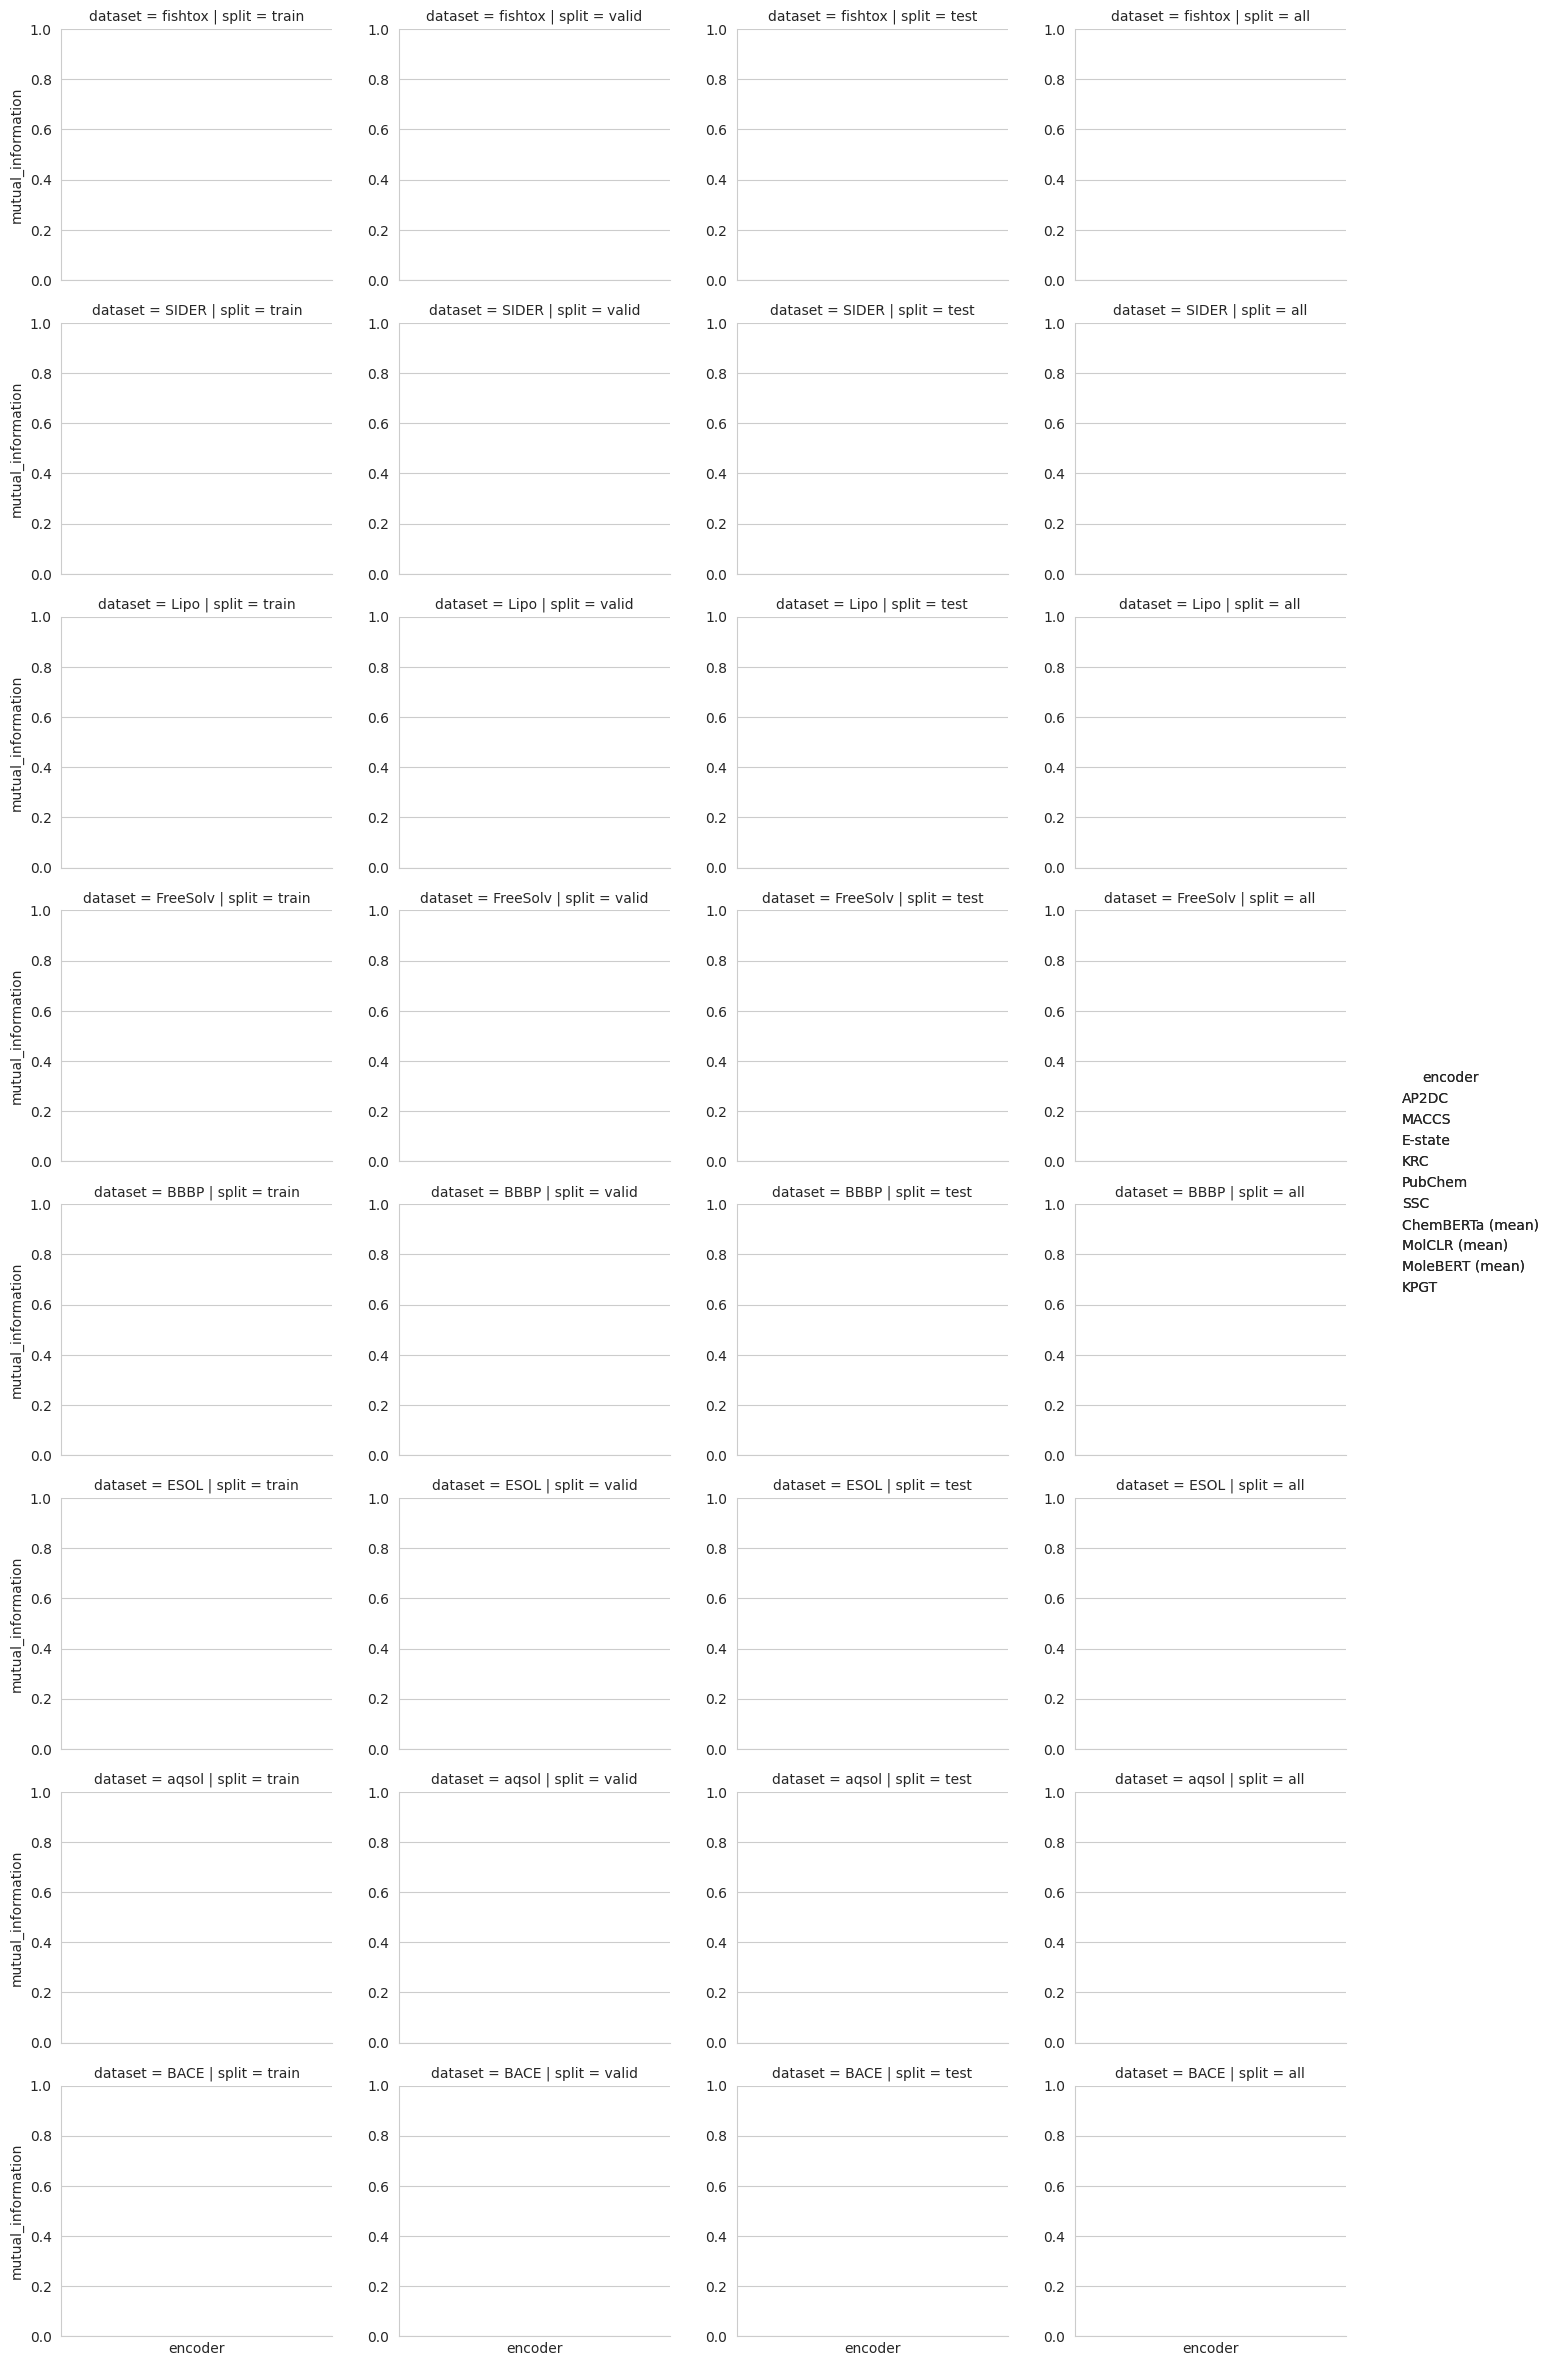

In [28]:
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 1.0

data = run_info.merge(
    agg_results, on='r_idx'
)
data['encoder'] = data['encoder'].replace(to_replace=names)


grid = sns.FacetGrid(
    data, 
    col='split', row='dataset', hue='encoder', 
    col_order=['train', 'valid', 'test', 'all'], 
    hue_order=order,
    sharey=False,
)
grid.map(sns.barplot, 'encoder', 'mutual_information', order=order, errorbar='ci', fill=True, alpha=0.8)


for i in range(grid.axes.shape[0]):
    for j in range(grid.axes.shape[1]):
        grid.axes[i,j].set_ylim(0,grid.axes[i,0].get_ylim()[1])
grid.add_legend()

for ax in grid.axes.reshape(-1):
    for i, patch in enumerate(ax.patches):
        if i>= len(grid.axes[-1,0].get_xticklabels()):
            break
        model = grid.axes[-1,0].get_xticklabels()[i].get_text()
        if model in ml_repr:
            patch.set_hatch('////')
        else:
            patch.set_hatch('\\\\')

for ax in grid.axes[-1,:]:
    ax.set_xticks([])
grid.add_legend()
sns.despine();

/home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/marco/a

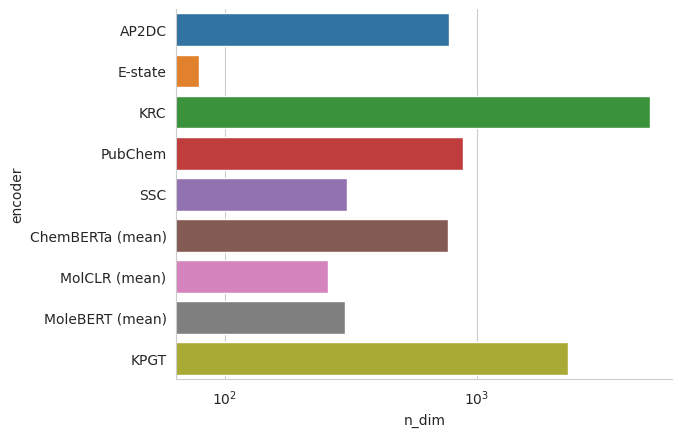

In [36]:
from copy import deepcopy
data = deepcopy(run_info)
data['encoder'] = data['encoder'].replace(to_replace=names)
sns.barplot(data, y='encoder', hue='encoder', x='n_dim', order=order, legend=False, orient='h', hue_order=order)
plt.xscale('log')
sns.despine()

In [16]:
run_info

,encoder,dataset,r_idx,n_dim
0,AtomPairs2DFingerprintCount,aqsol,qvlghsea,780
1,SubstructureFingerprintCount,BACE,h8gwu9gk,307
2,SubstructureFingerprintCount,BACE,iveb91vq,307
3,SubstructureFingerprintCount,BACE,bnr3j8rr,307
4,SubstructureFingerprintCount,BACE,ycdi0x0c,307
5,SubstructureFingerprintCount,BACE,hiq7b9bv,307
6,PubchemFingerprinter,BACE,jm3pp25o,881
7,PubchemFingerprinter,BACE,nbp5q4f4,881
8,PubchemFingerprinter,BACE,uldwwq7t,881
9,PubchemFingerprinter,BACE,1nycrn5u,881
